In [18]:
import numpy as np
import pandas as pd
import datetime as dt # date and time processing functions
import matplotlib.pyplot as plt # basic plotting 
import matplotlib.dates as mdates # date processing in matplotlib
from matplotlib.offsetbox import AnchoredText
plt.style.use('ggplot') # use ggplot style


import seaborn as sns
import os

In [19]:
df = pd.DataFrame()

for db in os.listdir('./data/'):
    df = pd.concat([df, pd.read_csv('./data/' + db, sep='\t', parse_dates=True, index_col=['date'])])

df.head()

df['mean'] = (df['min'] + df['max']) / 2
df.index = pd.to_datetime(df.index, format="%d/%m/%Y")
df.head()

,min,max,mean
date,,,
2018-01-01,7.0,13.0,10.0
2018-01-02,-1.0,7.0,3.0
2018-01-03,-1.0,10.0,4.5
2018-01-04,5.0,13.0,9.0
2018-01-05,5.0,15.0,10.0


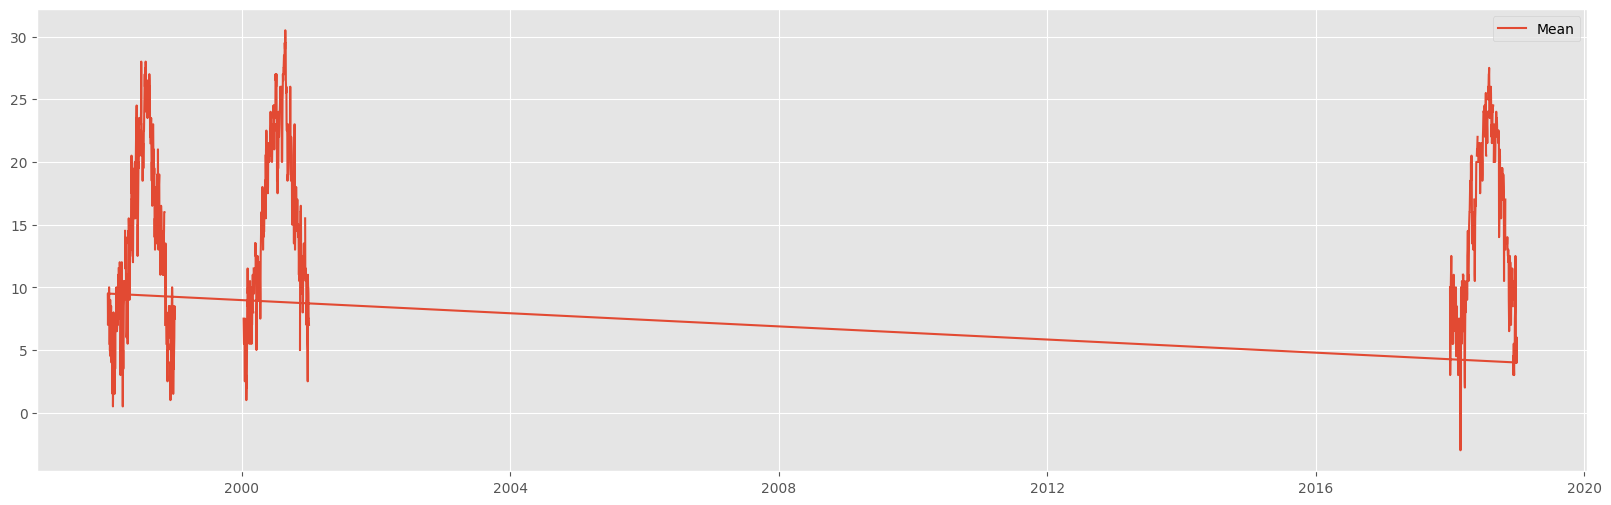

In [20]:
plt.figure(figsize=(20,6))

plt.plot(df.index, df['mean'], label='Mean')
#plt.plot(df.index, df['max'], label='Max')
#plt.plot(df.index, df['min'], label='Min')

plt.legend()

In [7]:
df['2018-01-01']

KeyError: '2018-01-01'